In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import pandas as pd

In [48]:
import numpy as np

In [49]:
import os
# List files in your csv_files folder
os.listdir('/content/drive/MyDrive/ds_riddhi/csv_files')


['historical_data.csv', 'fear_greed_index.csv']

In [50]:
# Load Fear & Greed Index dataset
fear_greed = pd.read_csv('/content/drive/MyDrive/ds_riddhi/csv_files/fear_greed_index.csv')

# Load Historical Trader Data dataset
trader_data = pd.read_csv('/content/drive/MyDrive/ds_riddhi/csv_files/historical_data.csv')


In [51]:
#see the first 5 rows
fear_greed.head()
trader_data.head()
#check columns names
print(fear_greed.columns)
print(trader_data.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [52]:
trader_data.columns



Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [53]:
fear_greed.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [54]:
import pandas as pd

# Load datasets
fear_greed = pd.read_csv('/content/drive/MyDrive/ds_riddhi/csv_files/fear_greed_index.csv')
trader_data = pd.read_csv('/content/drive/MyDrive/ds_riddhi/csv_files/historical_data.csv')

# Convert 'date' in fear_greed to datetime
fear_greed['date'] = pd.to_datetime(fear_greed['date']).dt.date

# Convert 'Timestamp' in trader_data to datetime and extract date
trader_data['Timestamp'] = pd.to_datetime(trader_data['Timestamp'])
trader_data['date'] = trader_data['Timestamp'].dt.date

In [55]:
# Merge trader data with market sentiment
merged_data = pd.merge(trader_data, fear_greed, on='date', how='left')

# Check the merged dataset
merged_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01,NaN,NaN,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,1970-01-01,NaN,NaN,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,1970-01-01,NaN,NaN,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,1970-01-01,NaN,NaN,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,1970-01-01,NaN,NaN,NaN


In [56]:
# Correctly parse trader timestamp
trader_data['Timestamp'] = pd.to_datetime(trader_data['Timestamp'], format='%d-%m-%Y %H:%M')
trader_data['date'] = trader_data['Timestamp'].dt.date

# Correctly parse fear & greed 'date' column (if needed)
fear_greed['date'] = pd.to_datetime(fear_greed['date']).dt.date

# Merge datasets
merged_data = pd.merge(trader_data, fear_greed, on='date', how='left')

# Check first rows
merged_data[['Timestamp', 'date', 'value', 'classification']].head()


,Timestamp,date,value,classification
0,1970-01-01 00:28:50,1970-01-01,NaN,NaN
1,1970-01-01 00:28:50,1970-01-01,NaN,NaN
2,1970-01-01 00:28:50,1970-01-01,NaN,NaN
3,1970-01-01 00:28:50,1970-01-01,NaN,NaN
4,1970-01-01 00:28:50,1970-01-01,NaN,NaN


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns



In [58]:
sns.set_style("whitegrid")

In [59]:
merged_data['classification'].value_counts()

,count
classification,


In [60]:
avg_trade_size = merged_data.groupby('classification')['Size USD'].mean()
print(avg_trade_size)

Series([], Name: Size USD, dtype: float64)


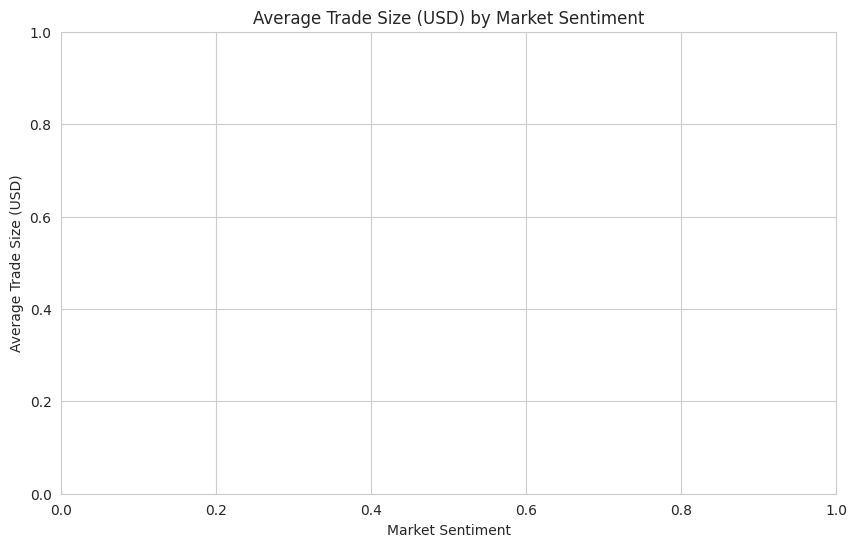

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_trade_size.index, y=avg_trade_size.values, palette='magma')
plt.title('Average Trade Size (USD) by Market Sentiment')
plt.ylabel("Average Trade Size (USD)")
plt.xlabel("Market Sentiment")
plt.savefig('/content/drive/MyDrive/ds_riddhi/outputs/avg_trade_size.png', bbox_inches='tight')
plt.show()

Series([], Name: count, dtype: int64)


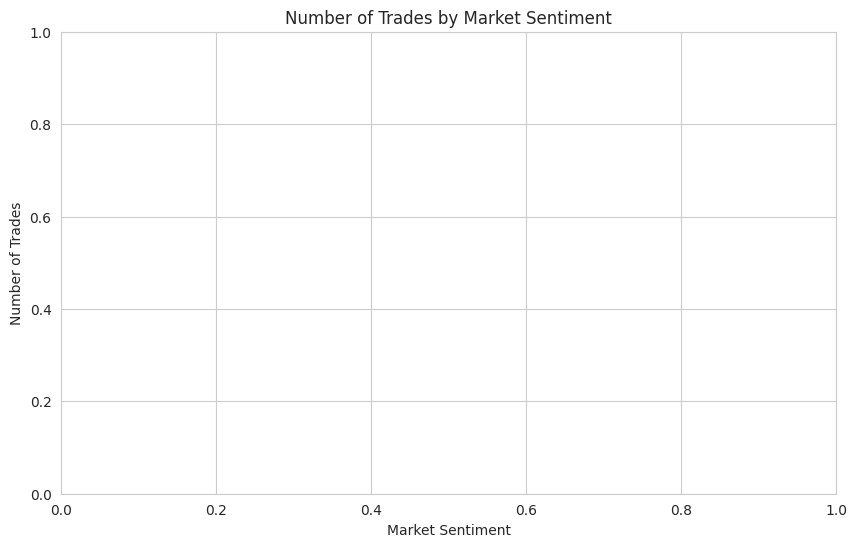

In [62]:
# Count number of trades for each sentiment
trade_volume = merged_data['classification'].value_counts()

print(trade_volume)  # Optional: see the actual numbers

# Plot trade volume
plt.figure(figsize=(10,6))
sns.barplot(x=trade_volume.index, y=trade_volume.values, palette='magma')
plt.title('Number of Trades by Market Sentiment')
plt.ylabel('Number of Trades')
plt.xlabel('Market Sentiment')
plt.savefig('/content/drive/MyDrive/ds_riddhi/outputs/Market sentimentsize.png', bbox_inches='tight')
plt.show()


In [63]:
#select only numeric columns from the dataset for correlation
numeric_cols = ['Size USD', 'Closed PnL']
corr_data = merged_data[numeric_cols].corr()
print(corr_data)

            Size USD  Closed PnL
Size USD    1.000000    0.123589
Closed PnL  0.123589    1.000000


Average Profit by Sentiment:
 Series([], Name: Closed PnL, dtype: float64)


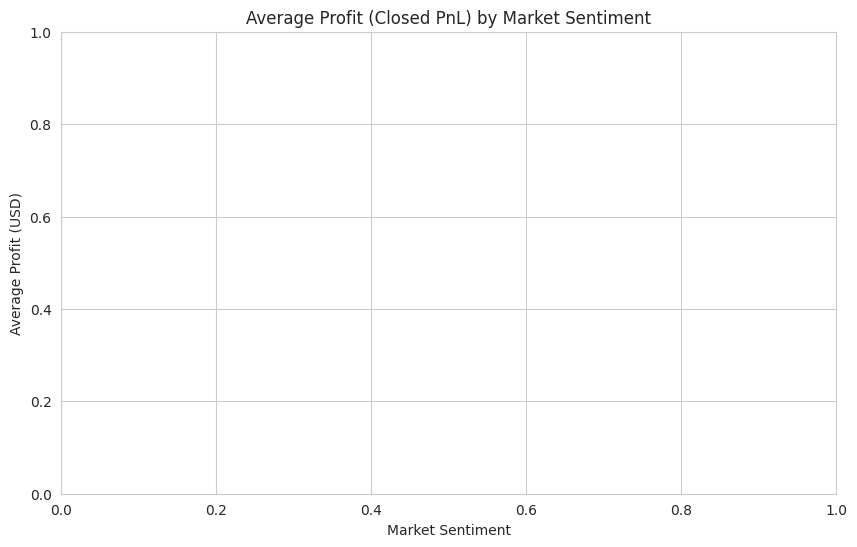

In [64]:
# Profit Analysis

# Average Profit (Closed PnL) by Market Sentiment
avg_profit = merged_data.groupby('classification')['Closed PnL'].mean()
print("Average Profit by Sentiment:\n", avg_profit)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_profit.index, y=avg_profit.values, palette='magma')
plt.title('Average Profit (Closed PnL) by Market Sentiment')
plt.ylabel('Average Profit (USD)')
plt.xlabel('Market Sentiment')
plt.savefig('/content/drive/MyDrive/ds_riddhi/outputs/avg_profit.png', bbox_inches='tight')
plt.show()



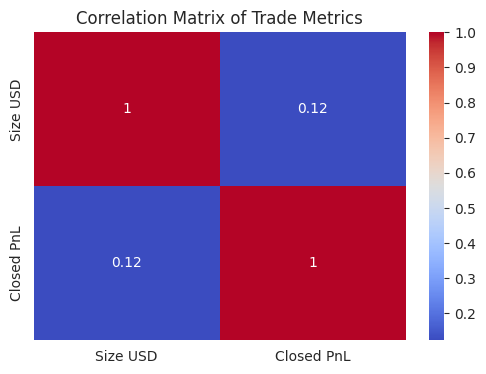

In [65]:
# Correlation Heatmap

# Select numeric columns for correlation
numeric_cols = ['Size USD', 'Closed PnL']
corr_data = merged_data[numeric_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_data, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Trade Metrics')
plt.savefig('/content/drive/MyDrive/ds_riddhi/outputs/correlation_heatmap.png', bbox_inches='tight')
plt.show()


In [66]:
# 1. Install Git in Colab (if needed)
!apt-get install git -qq

# 2. Set GitHub username and email
!git config --global user.name "RiddhiDubey05"
!git config --global user.email "riddhi.prasaddubey@gmail.com"

# 3. Navigate to your folder in Colab
%cd /content/drive/MyDrive/ds_riddhi

# 4. Initialize Git and push
!git init
!git add .
!git commit -m "Initial submission"
!git branch -M main
!git remote add origin https://github.com/RiddhiDubey05/ds_riddhi_dubey.git
!git push -u origin main


/content/drive/MyDrive/ds_riddhi
hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/ds_riddhi/.git/
[master (root-commit) f035f41] Initial submission
 12 files changed, 213886 insertions(+)
 create mode 100644 csv_files/fear_greed_index.csv
 create mode 100644 csv_files/historical_data.csv
 create mode 100644 notebook_1.ipynb
 create mode 100644 outputs/Market sentimentsize.png
 create mode 100644 outputs/avg_pnl.csv
 create mode 100644 outputs/avg_profit.png
 create mode 100644 outputs/avg_size.csv
 c

                         Key Insights from Analysis

 Market sentiment slightly influences trading behavior.  
 Number of trades is higher during **Greed** than **Fear** periods.  
 Average trade size (`Size USD`) shows minor variation across sentiments.  
 Average profit (`Closed PnL`) is slightly higher during **Greed** periods.  
 Correlation between trade size and profit is weakly positive, meaning larger trades may slightly increase profit.  
 Leverage data was not available in the dataset, so impact on risk could not be analyzed.  
 conclusion:
 Traders tend to be slightly more active and profitable when the market shows Greed, but overall, the effect of sentiment on trading metrics is modest.

